# In-Class Assignment: Multiple Regression
# Day 14
# CMSE 202

### <p style="text-align: right;"> &#9989; Jai</p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

---
### Goals

By the end of today's class, you'll have practiced:
* Loading and manipulated fixed width column data
* Replacing/removing missing data entries
* Performing multiple regression using all features and a reduced set of statistically significant features.

### Agenda for today's class:

1. [Working with more unfamiliar data](#data)
1. [Multiple Regression](#multiple-regression)
1. [Visualization - How well does our model fit our data?](#viz)

### Imports

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("notebook")
import pandas as pd
import statsmodels.api as sm


---
<a id="data"></a>
## 1. Working with more unfamiliar data 

We are going to work with some data generated by U.N.E.S.C.O. (United Nations Education, Scientific, and Cultural Organization) and data they collected relating to poverty and inequality in the world. There are two files you need to do the work:

- `poverty.dat` which is the data file itself
- `poverty.txt` which describes the data columns as **fixed width column** data. That is, this file describes the columns of the data for each category. For example, the data in columns 1-6 of `poverty.dat` contain the "live birth rates per 1,000 population".

You can download the files from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/poverty.dat`

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/poverty.txt`

### How does one deal with a "fixed width column" data file?

Conveniently there is a fixed width column pandas data reader. Look it up and read in the data. **Check with your group members to make sure every can find the right function to use!**

Again we find ourselves with a data file does doesn't contain any column headers (argh!).  Take a look at the `poverty.txt` file for column information and give the columns in your Pandas DataFrame short, but useful names.

**&#9989; Do This:** Read the data into a DataFrame and display the `head()` of the DataFrame. Remember that you can set the column labels by setting the `.columns` attribute to a list with the appropriate column labels.

In [54]:
# put your code here
pov=pd.read_fwf(
    'poverty.dat',
    names=['birth_rate', 'death_rate', 'infant_deaths', 'life_exp_m', 'life_exp_f', 'gnp', 'group', 'country'],
    na_values="*"
)
pov.dtypes

birth_rate       float64
death_rate       float64
infant_deaths    float64
life_exp_m       float64
life_exp_f       float64
gnp              float64
group              int64
country           object
dtype: object

### 1.1 Examining the "type" of the data

**&#9989; Questions:**  Now look at the `.dtypes` of your DataFrame and comment on anything that doesn't immediately make sense to you. Do all of the columns have a type that matches your expectations? If not, what is it about the values in the DataFrame that is causing this?

<font size=+3>&#9998;</font> Country and GNP are objects. They are strings (the GNP is an object because it contains asterisks so the data becomes strings) so the column is listed as an object. Since there are mixed types they turn into an object.

### 1.2 Handling missing data - Imputation

Let's face it, sometimes data is bad. Values are not recorded, or are mis-recorded, or are so far outside of your expectations that you suspect that there is something wrong. On the other hand, just **changing** the data seems like cheating. We have to work with what we have, and if we have to make changes it would be good to do that programmatically so that it is recorded for others to see. 

The process of <a href="https://en.wikipedia.org/wiki/Imputation_(statistics)"> imputation </a> is the statistical replacement of missing/bad data with substitute values.

**It turns out that we have a case of missing data in our dataset!** In the **Gross National Product (GNP)** column some of the values are set to " \* " indicating missing data. When Pandas reads in the column the only type that makes sense when both characters _and_ numbers are present is a string. Therefore Pandas chose to set the type to `object` instead of the expected `int64` or `float64`.

#### Using `numpy.nan` as a replacement

For better or worse, pandas assumes that "bad values" will be marked in the data as **NaN** which it can then represent using [NumPy's "`nan`"](https://numpy.org/doc/stable/reference/constants.html#numpy.nan). NaN is short for "Not a Number".

**If we can mark the missing data with "NaN" instead of "\*", we will have access to some of the imputation methods, which would allow us to replacing the NaN values with various substitution values (e.g. mean, median, specific value, etc.)**. 

There are (at least) **two ways** to do this:
1. You can do a `.replace` on the column using a dictionary of the form "{value to replace : new value, ...}". If you do this, **remember to save the result**. After you do this, you'll still need to change the column type from "object" to a "float64" in order to assure that the values are numeric values. Note that you cannot convert a `np.nan` to an integer but you can to a float.
2. You can convert the everything that can be converted to a number using the Pandas `.to_numeric()` function. Conveniently if you use the "`errors`" argument in the function you can force Pandas to convert any non-numbers to "`np.nan`" values. As with the previous method, you need to save the converted column in place of the column with the "\*" entries. This option has the benefit of not requiring an additional step of having to manually change the data type!

**&#9989; Do This:** Convert the missing entries in the GNP column to `np.nan` values and show the head of your modified DataFrame to ensure that the "NaN" values are showing up. Also print the `dtypes` to show that the column has changed type.

In [34]:
# put your code here
pov=pov.replace('*',np.nan)
pov

,birth_rate,death_rate,infant_deaths,life_exp_m,life_exp_f,gnp,group,country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,NaN,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary
...,...,...,...,...,...,...,...,...
92,52.2,15.6,103.0,49.9,52.7,220,6,Uganda
93,50.5,14.0,106.0,51.3,54.7,110,6,Tanzania
94,45.6,14.2,83.0,50.3,53.7,220,6,Zaire
95,51.1,13.7,80.0,50.4,52.5,420,6,Zambia


#### Changing np.nan values

Now that "bad values" are marked as `numpy.nan`, we can use the DataFrame method `fillna` to change those values. For example:

In [29]:
pov["GNP"].fillna(0)

0      600
1     2250
2     2980
3        0
4     2780
      ... 
92     220
93     110
94     220
95     420
96     640
Name: GNP, Length: 97, dtype: object

The above cell returns a new DataFrame where all the `np.nan` values in the GNP column are replaced with 0.

You can do other things are well, for example:

In [28]:
# Two ways of accomplishing the same thing:

# Change the values in the series object (the column) directly
pov["GNP"].fillna(pov["GNP"].mean())

# Changes the value of the series object (the column) by accessing the full dataframe and using a dictionary to reference the column
pov.fillna({"GNP": pov["GNP"].mean()})

TypeError: can only concatenate str (not "int") to str

**Both of the lines in the above cell do the same thing**. The first version changes any `np.nan` in the `GNP` column to be the mean of the column. The second takes a dictionary where the the key of the dictionary is the column to change and the value is what to replace the `np.nan` with. Note you could replace with other values like: median, min, max, or some other fixed value.

Remember that all of these examples return either a new Series (when working with just a column) or a DataFrame (if working with the entire element). Nothing is changed in the original unless you assign the result or use `inplace=True` in the call.

Finally, if you decide that the right thing to do is **remove** any row with a `np.nan` value, we can use the `.dropna` method of DataFrames as shown below:

In [35]:
len(pov)
pov2 = pov.dropna()
print(len(pov), len(pov))
pov2

97 97


,birth_rate,death_rate,infant_deaths,life_exp_m,life_exp_f,gnp,group,country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary
5,14.3,10.2,16.0,67.2,75.7,1690,1,Poland
...,...,...,...,...,...,...,...,...
92,52.2,15.6,103.0,49.9,52.7,220,6,Uganda
93,50.5,14.0,106.0,51.3,54.7,110,6,Tanzania
94,45.6,14.2,83.0,50.3,53.7,220,6,Zaire
95,51.1,13.7,80.0,50.4,52.5,420,6,Zambia


#### What do you think?

**&#9989; Do This:** Discuss with your group what you think is the best thing to do with the "bad values" in the DataFrame given the discussion above. Make a collective decision and record it below. Once you've come to a decision, modify your dataset accordingly.

<font size=+3>&#9998;</font> I think the best way is to just drop the rows because it is not accurate to keep them as a value when the true value is unknown.

---
<a id="multiple-regression"></a>
## 2. Multiple Regression

In the past, we have limited ourselves to using a single feature or independent variable to fit a line or, as in the pre-class, created additional features based on our original feature to fit a polynomial. However, **we can just as easily use all, or some combination of all, the features available our dataset** to make a OLS model. This is referred to as multiple regression (you can see a brief introduction [here](https://medium.com/swlh/understanding-multiple-linear-regression-e0a93327e960)). The question is, **is it a good idea to just use all the possible features available to make a model?**

**&#9989; Do This:** Discuss this idea with your group and record your answer below.

<font size=+3>&#9998;</font> No i dont know what they is

### 2.1 Infant Mortality model

Using the U.N.E.S.C.O. data, we can make a model of "Infant Mortality" as the dependent variable against all the other available features. As a hint, an easy way to do this is the make the `sm.OLS` model with  "Infant Mortality" as the first argument (the dependent variable) and then the entire DataFrame where "Infant Mortality" is dropped as the second argument. **You should also drop the "Country" column as unique strings don't play well in basic linear models.**

**&#9989; Do This:** Make an OLS model that predicts "Infant Mortality" using the other variables (making sure to drop the "Country" column as well) and display the `.summary()` of that process. 

In [58]:
from statsmodels.formula.api import ols

povmodel=ols(formula='infant_deaths~birth_rate+death_rate+life_exp_m+life_exp_f+gnp+group',data=pov).fit()

In [59]:
povmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          infant_deaths   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           2.44e-43
Time:                        16:18:08   Log-Likelihood:                -364.09
No. Observations:                  91   AIC:                             742.2
Df Residuals:                      84   BIC:                             759.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    368.3810     44.257      8.324      0.000     280.371     456.391
birth_rate     0.1671      0.267      0.626      0.533      -0.364       0.698
death_rate    -0.5619      0.579     -0.970      0.335      -1.714       0.590
life_exp_m     0.4963      0.888      0.559      0.578      -1.269       2.262
life_exp_f    -5.0160      0.854     -5.874      0.000      -6.714      -3.318
gnp            0.0005      0.000      1.864      0.066   -3.49e-05       0.001
group         -3.5785      1.430     -2.502      0.014      -6.422      -0.735
==============================================================================
Omnibus:                       24.662   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.902
Skew:                           0.943   Prob(JB):                     4.41e-13
Kurtosis:                       6.384   Cond. No.                     3.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are several interesting things about this `.summary()`. Let's start with things you have seen before.

**&#9989; Do This:** Look for the adjusted $R^2$ statistic. What does this adjusted $R^2$ tell you about how well your model fits your data?

<font size=+3>&#9998;</font> how well correlated all of the data is

Now, let's look at something new, **the "P" values** associated with the features used in the model. [P values](https://en.wikipedia.org/wiki/P-value) are used widely in statisical testing to judge if a result is statistically significant. Those P values that are 0 (or typically less 0.05) indicate a feature that is "significant" in its ability to predict the dependent variable. Those larger than 0.05 are less significant. Of course, one should be cautious with relying solely on P-values as they can be [misused](https://en.wikipedia.org/wiki/Misuse_of_p-values) and [p-hacking](https://en.wikipedia.org/wiki/Data_dredging) (intentional or not) can lead to misleading results.

**&#9989; Do This:** With a healthy dose of caution in mind, review your P-values. The values you get will depend on what you did with your "bad values", but list below the top three "most significant" features and the overall Adjusted R-squared using all the features.

<font size=+3>&#9998;</font> 2 have really large P-values. gnp, life_exp_f and group had the best P-values.

### 2.2 A "reduced" model using only the "significant" features

Modeling data is as much a craft as it is a science. We often seek the simplest models that explain or data well because they are typically more interpretable, easier to explain, and provide the information on the main influences of the system we are studying. There are reasons we might want a more complex model to capture the details and the nuance of the system. But for the U.N.E.S.C.O. data that we have, we are likely able to capture most of the system using a smaller number of features. _These ideas are related to the pre-class modeling you did with increasingly higher powers of `x`._

**&#9989; Do This:** Redo the model with only the top three features you found above vs "Infant Mortality". Display the summary.

In [60]:
povmodel2=ols(formula='death_rate~life_exp_f+gnp+group',data=pov).fit()
povmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     52.95
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.44e-19
Time:                        16:19:26   Log-Likelihood:                -221.87
No. Observations:                  91   AIC:                             451.7
Df Residuals:                      87   BIC:                             461.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9860      3.912     12.779      0.000      42.211      57.761
life_exp_f    -0.5432      0.050    -10.884      0.000      -0.642      -0.444
gnp            0.0002   5.12e-05      4.650      0.000       0.000       0.000
group         -1.1946      0.254     -4.700      0.000      -1.700      -0.689
==============================================================================
Omnibus:                        5.764   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                8.419
Skew:                           0.140   Prob(JB):                       0.0149
Kurtosis:                       4.464   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**&#9989; Do This:** Review this model and the one you constructed earlier in the notebook. Report how the Adjusted R-squared value changed from using only the top three vs using all the available features. How well does this reduced model appear to fit your data?

<font size=+3>&#9998;</font> the R^2 is worse.

---
<a id="viz"></a>
## 3. Visualization - How well does our model fit our data?

We have been checking how our models fit our data using both plots of the fitted values and the residuals. These plots are generated from the information stored in [various attributes of the OLS results object](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html). We will continue to use the top two plots from `.graphics.plot_regress_exog` to investigate our fits. But you could also construct the plots directly using the attributes of the OLS results object.

**Note that you will need one plot for each feature in the model as each figure is only produced for a given choice of feature.**

**&#9989; Do This:** Create three `.graphics.plot_regress_exog` figures, one for each of the features in your reduced model. Pay special attention to the top two plots: the fitted values figure and the residual plot.

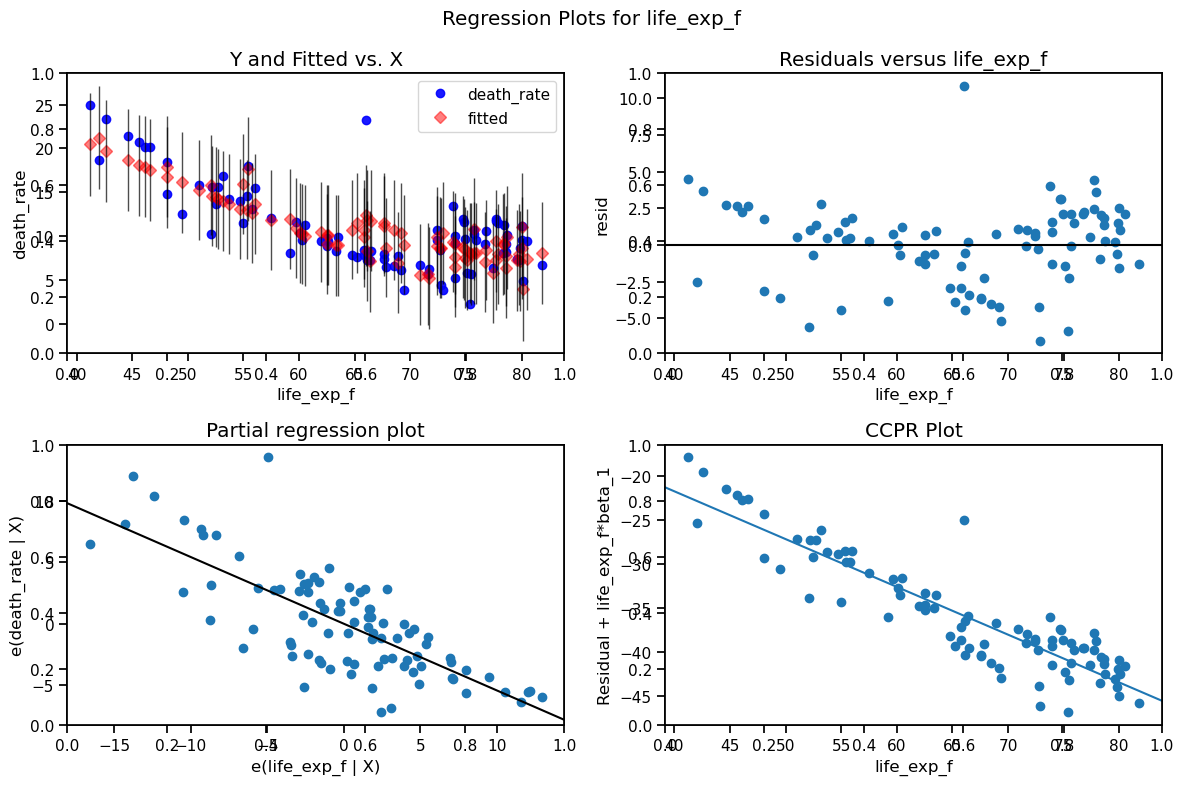

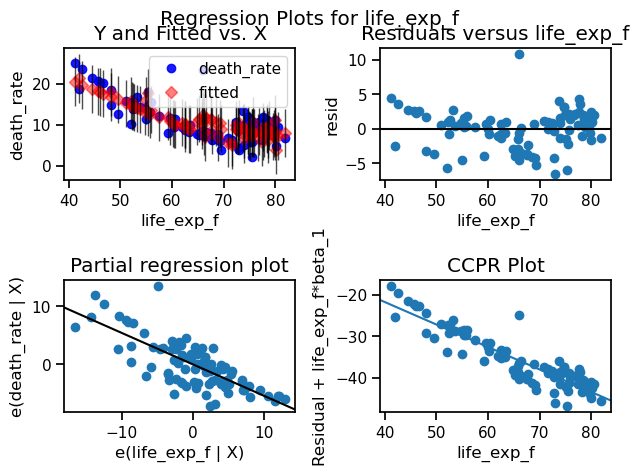

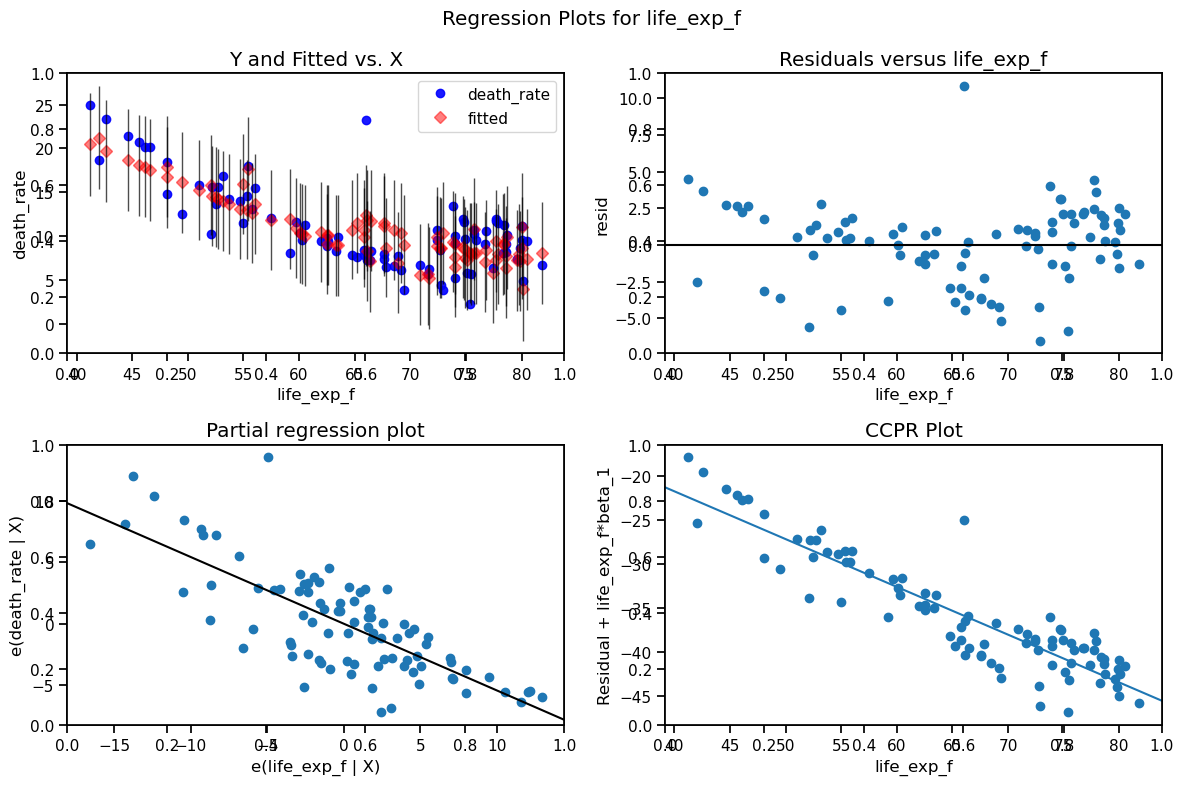

In [64]:
sm.graphics.plot_regress_exog(povmodel2,exog_idx=1)

fig,ax=plt.subplots(2,2,figsize=(12,8))
sm.graphics.plot_regress_exog(povmodel2,exog_idx=1,fig=fig)

**&#9989; Questions:** Based on these figures, how well does it appear your reduced model fit your data? Do you have any concerns about the distribution of the residuals?

<font size=+3>&#9998;</font> looks like it fits well enough.

-----
### Congratulations, you're done with your in-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University

<!-- 9/16/2024 -->